In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('bank.csv', delimiter=';')

In [451]:
t1 = np.array([data['age'].tolist()]).reshape(-1,1)
t2 = np.array([data['balance'].tolist()]).reshape(-1,1)

n = t1.shape[0]
x1 = np.ones((n, 2))
x1[:, 0] = t1.flatten()
x1[:, 1] = t2.flatten()
x1

array([[  30., 1787.],
       [  33., 4789.],
       [  35., 1350.],
       ...,
       [  57.,  295.],
       [  28., 1137.],
       [  44., 1136.]])

In [452]:
k = 4
x = data[['age', 'balance']].values
kmeans = KMeans(n_clusters= k)
kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_
centroids

c:\Users\dong5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[   43.38      , 10670.01333333],
       [   40.74012531,   441.52002179],
       [   46.47826087, 26353.69565217],
       [   42.83161004,  3846.94091581]])

In [453]:
x[:, 0]

array([30, 33, 35, ..., 57, 28, 44], dtype=int64)

In [454]:
x[:, 1]

array([1787, 4789, 1350, ...,  295, 1137, 1136], dtype=int64)

In [455]:
kmeans.transform(x)

array([[ 8883.02341011,  1345.52284338, 24566.70117862,  2059.98088021],
       [ 5881.02249369,  4347.48686835, 21564.69986423,   942.11038561],
       [ 9320.01710073,   908.49811218, 25003.69828679,  2496.95319763],
       ...,
       [10375.02227329,   147.4194706 , 26058.69777636,  3551.96917394],
       [ 9533.02573992,   695.59665819, 25216.70242241,  2709.98150248],
       [ 9534.01335349,   694.48762906, 25217.69577395,  2710.94116759]])

In [456]:
kmeans.labels_

array([1, 3, 1, ..., 1, 1, 1])

2023-08-11 21:22:42,718 WARNING No handles with labels found to put in legend.


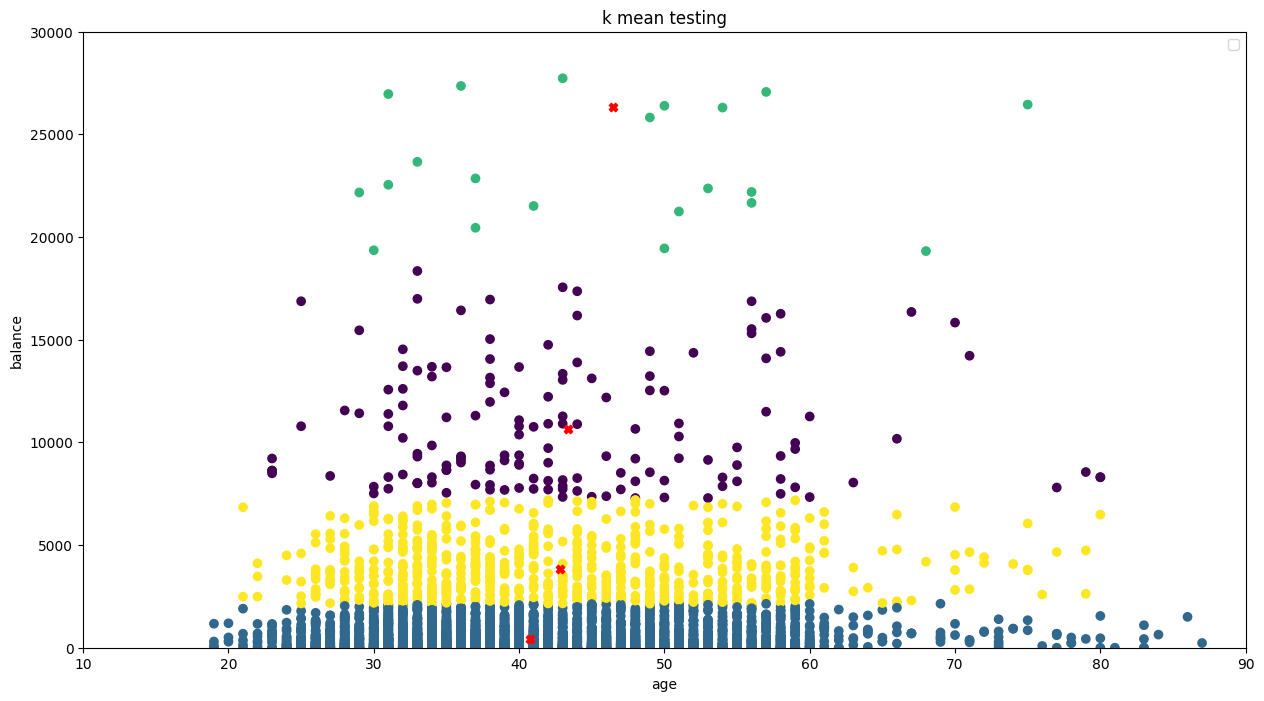

In [457]:
plt.figure(figsize=(15,8))
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.title('k mean testing')
plt.axis([10, 90, 0, 30000])
plt.xlabel('age')
plt.ylabel('balance')
plt.legend()
plt.show()

In [458]:
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

x, _ = make_classification(n_samples=100)

In [459]:
x2 = x[:, :2]
x2

array([[-1.2712516 , -0.87324904],
       [-1.24563579, -0.02290998],
       [-0.42680156,  0.07643521],
       [ 0.21588654, -1.58756419],
       [-0.41347893, -0.02810709],
       [ 0.72393693,  0.96717464],
       [ 0.00704285,  0.58591724],
       [ 0.08206798,  0.06468165],
       [-0.22680751, -1.03926891],
       [ 0.69365468,  0.36450143],
       [-0.34353301, -0.57659742],
       [-0.07739555, -1.2837213 ],
       [-0.81259557,  0.09138736],
       [ 0.76650299,  1.72413184],
       [ 0.98698576,  1.23318089],
       [-0.79434447,  0.69556636],
       [ 0.83674528,  0.25324681],
       [-0.6009322 , -0.59019784],
       [-0.4004136 , -0.00733202],
       [-1.20127282, -2.77196558],
       [ 0.62984821, -0.63211348],
       [-0.6607475 , -0.4100163 ],
       [-0.33282381, -0.03445266],
       [-0.44267143,  0.72105243],
       [ 0.7750331 ,  0.89314555],
       [-0.75320138, -0.65464158],
       [ 0.51199412, -0.75105916],
       [-0.77533412,  0.52305178],
       [-1.15177198,

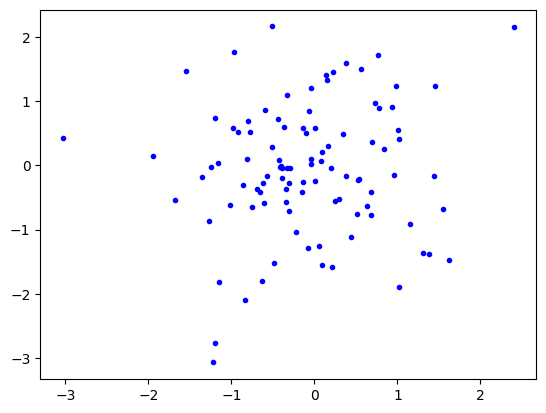

In [460]:
plt.plot(x2[:,0],x2[:,1],'b.')

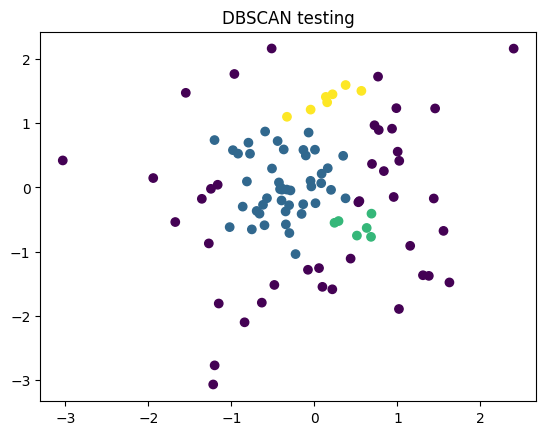

In [480]:
dbscan = DBSCAN(eps=0.357, min_samples=5)
labels = dbscan.fit_predict(x2)

plt.scatter(x2[:, 0], x2[:, 1], c=labels)
plt.title('DBSCAN testing')
plt.show()

In [462]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(x2)

In [463]:
labels

array([-1, -1,  0, -1,  0, -1,  2,  0, -1, -1,  0, -1, -1, -1, -1,  1, -1,
        0,  0, -1, -1,  0,  0, -1, -1,  0, -1,  1, -1,  2, -1, -1,  0, -1,
        0,  2, -1,  0,  1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  0, -1,  1,  0, -1,  2,
       -1,  0,  0, -1, -1, -1,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1,  0,
       -1,  0, -1,  2,  0, -1, -1, -1,  0,  1, -1, -1,  0, -1, -1],
      dtype=int64)

2023-08-11 21:22:43,357 WARNING No handles with labels found to put in legend.


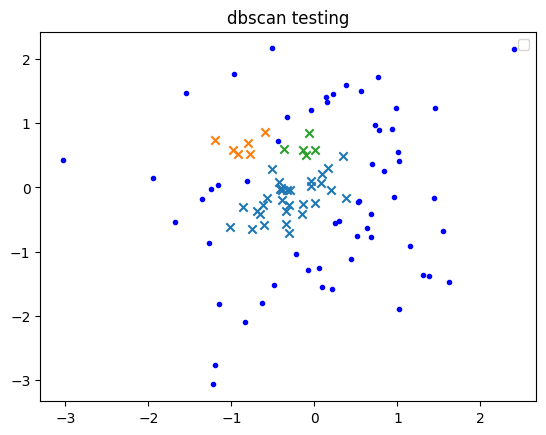

In [464]:
plt.scatter(x2[labels == -1][:, 0], x2[labels == -1][:, 1], c='blue', marker='.')
for i in np.unique(labels[labels != -1]):
    plt.scatter(x2[labels == i][:, 0], x2[labels == i][:, 1], marker='x')

plt.title('dbscan testing')
plt.legend()
plt.show()
